# Machine Learning

__Machine learning__ is a method of _data analysis_ that automates
_analytical model building_.
It is a branch of _artificial intelligence_ based on the idea that systems
can _learn from data_, _identify patterns_ and _make decisions_ with
minimal human intervention.

## Sci-kit Learn (SKlearn, Scipy, Numpy)

__Scikit-learn__ is a _Python package_ that provides a wide range of _machine learning algorithms_ and tools. 
It is built on top of _NumPy_, _SciPy_, and _Matplotlib_, and is designed to be simple and efficient for data analysis and modeling.

__Scikit-learn__ offers various modules for tasks such as _classification_, _regression_, _clustering_, _dimensionality reduction_, and _model selection_.
It also provides utilities for _preprocessing data_, _evaluating models_, and _handling datasets_.

With its extensive documentation and user-friendly interface, __Scikit-learn__ is widely used in the field of machine learning and data science.

In [4]:
#!pip install scikit-learn
import numpy as np
import pandas as pd
import sklearn as sk


In [5]:
# spplitting the data into training and testing data
from sklearn.model_selection import train_test_split
# importing the dataset
titanic_df = pd.read_csv('datasets_kaggle/titanic.csv')
titanic_df = titanic_df[titanic_df['Age'].notna()]
# columns_list is a list of column names to be used as features
columns_list = ['Pclass','Age','SibSp','Parch','Fare','Embarked']
# Splitting the data into features and target
X = titanic_df[columns_list] #Features
Y = titanic_df['Survived'] #Target
# Splitting the dataset into training and testing sets
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
print(X.isnull().sum())
X

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


,Pclass,Age,SibSp,Parch,Fare,Embarked
0,3,22.0,1,0,7.2500,S
1,1,38.0,1,0,71.2833,C
2,3,26.0,0,0,7.9250,S
3,1,35.0,1,0,53.1000,S
4,3,35.0,0,0,8.0500,S
...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,Q
886,2,27.0,0,0,13.0000,S
887,1,19.0,0,0,30.0000,S
889,1,26.0,0,0,30.0000,C


### K-Nearest Neighbors

__K-Nearest Neighbors__ is a simple algorithm that _stores all available
cases_ and _classifies_ new cases based on a similarity measure.

It is a type of _instance-based learning_, or _lazy learning_, where the
function is only approximated locally and all computation is deferred
until function evaluation.

In [6]:
import pandas as pd
import numpy as np

data = [(0,2,'A'),(3,7,'B'),(8,4,'A'),(3,8,'A'),(9,4,'B'),(3,6,'B')]
df = pd.DataFrame(data, columns=['x','y','target'])
point = (2,3)
k=3
df['distance'] = np.sqrt((df['x']-point[0])**2 + (df['y']-point[1])**2)
df = df.sort_values(by='distance').iloc[:k]
df['target'].value_counts().idxmax()

'B'

In [7]:
# Classification of the data
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Feature scaling for better performance of KNN
scaler = StandardScaler()
columns_list = ['Pclass','Age','SibSp','Parch','Fare']
X_train_scaled = scaler.fit_transform(X_train[columns_list])
X_test_scaled = scaler.fit_transform(X_test[columns_list])
# Creating the KNN model
knn = KNeighborsClassifier(n_neighbors=30)
# Fitting the model with the training data
knn.fit(X_train_scaled, Y_train)
# Testing model performance
y_hat = knn.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, y_hat)
print(f'Accuracy: {accuracy}')
# Predicting the class for the new input
new_input = [1,40,1,1,50.0]
new_input_scaled = scaler.transform([new_input])
prediction = knn.predict(new_input_scaled)
print(f'Prediction: {prediction}')
X_train_scaled

Accuracy: 0.7116279069767442
Prediction: [1]


c:\PythonEnvironments\entorno\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.93574611, -0.62918643, -0.54619017, -0.49495371, -0.58475221],
       [-0.25238954, -1.70607682,  0.57541022,  1.77093529, -0.15874221],
       [ 0.93574611, -0.12439406, -0.54619017, -0.49495371, -0.60250191],
       ...,
       [-1.44052519,  0.71692656, -0.54619017, -0.49495371,  2.14971302],
       [ 0.93574611,  0.17848136,  0.57541022,  0.63799079, -0.31498192],
       [ 0.93574611,  0.17848136, -0.54619017, -0.49495371, -0.58808677]])

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# Regression of the data
insurance_df = pd.read_csv('datasets_kaggle/insurance.csv')
columns_list = ['age','bmi','children']
X = insurance_df[columns_list]
Y = insurance_df['charges']
X_insurance_train, X_insurance_test, Y_insurance_train, Y_insurance_test = train_test_split(X,Y,test_size=0.3, random_state=42)
# Feature scaling for better performance of KNN
scaler = StandardScaler()
X_insurance_train_scaled = scaler.fit_transform(X_insurance_train)
X_insurance_test_scaled = scaler.fit_transform(X_insurance_test)
# Creating the KNN model for regression
knn_regressor = KNeighborsRegressor(n_neighbors=100)
# Fitting the model with the training data
knn_regressor.fit(X_insurance_train_scaled, Y_insurance_train)
# Assuming new_input is a new data point you want to predict
# new_input should be a list of values corresponding to columns_list
#TEST THE MODEL
y_insurance_hat = knn_regressor.predict(X_insurance_test_scaled)
mse = mean_squared_error(Y_insurance_test, y_insurance_hat)
print(f'Mean Squared Error: {mse}')
results = pd.DataFrame({'Actual':Y_insurance_test, 'Predicted':y_insurance_hat})
results

Mean Squared Error: 128168584.53657374


,Actual,Predicted
764,9095.06825,13365.530321
887,5272.17580,10702.703241
890,29330.98315,16057.890708
1293,9301.89355,13982.355161
259,33750.29180,10051.233431
...,...,...
701,9541.69555,18378.169200
672,4399.73100,10882.766314
1163,2200.83085,8323.132137
1103,11363.28320,18182.509144


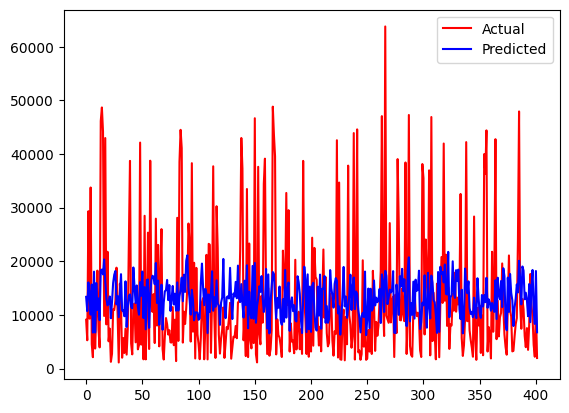

In [10]:
from matplotlib import pyplot as plt
x = np.arange(results.shape[0])
plt.plot(x,Y_insurance_test, color='red', label='Actual')
plt.plot(x,y_insurance_hat, color='blue', label='Predicted')
plt.legend()

### Linear Regression with Least Squares

__Linear regression__ is a type of _regression analysis_ used for predicting the value of a _continuous dependent variable_. It works by finding the _line that best fits the data_.

_Least squares_ is a method for finding the _best-fitting_ line by __minimizing__ the _sum of the squared differences_ between the predicted and actual values.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating the Linear Regression model
linear_regression = LinearRegression()
# Fitting the model with the training data
linear_regression.fit(X_insurance_train_scaled, Y_insurance_train)
# Assuming new_input is a new data point you want to predict
y_insurance_hat = linear_regression.predict(X_insurance_test_scaled)
mse = mean_squared_error(Y_insurance_test,y_insurance_hat)
# new_input should be a list of values corresponding to columns_list
print(mse)
# Predicting the target for the new input


127276878.18212162


### Regularization with Ridge and Lasso

__Ridge regression__ (_L2_) and __Lasso regression__ (_L1_) are a type of _linear regression_ that includes a _penalty_ term to __prevent overfitting__. They work by adding a _regularization term_ to the least squares objective function

In [15]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# implementing Rigde Regression (L2 regularization)

# Creating the Ridge Regression model
# alpha is the regularization strength; larger values specify stronger regularization.
ridge_regressor = Ridge(alpha=1.0)
# Fitting the model with the training data
ridge_regressor.fit(X_insurance_train_scaled, Y_insurance_train)
# Making predictions on the test set
y_hat = ridge_regressor.predict(X_insurance_test_scaled)
mse = mean_squared_error(Y_insurance_test, y_hat)
# Calculating the mean squared error of the predictions
print(f'Mean Squared Error:{mse}')

Mean Squared Error:127279669.05978769


In [18]:
# implementing Lasso Regression (L1 regularization)
from sklearn.linear_model import Lasso
# Creating the Lasso Regression model
lr = Lasso(alpha=1.0)
# alpha is the regularization strength; larger values specify stronger regularization.
# Fitting the model with the training data
lr.fit(X_insurance_train_scaled, Y_insurance_train)
# Making predictions on the test set
y_insurance_hat = lr.predict(X_insurance_test_scaled)
mse = mean_squared_error(Y_insurance_test, y_insurance_hat)
# Calculating the mean squared error of the predictions
print(f'Mean Squared Error:{mse}')
# To understand feature sensitivity, you can look at the coefficients
coeficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeficients

Mean Squared Error:127277067.39010051


,Coefficient
age,3232.315154
bmi,2010.058377
children,776.754112


### Polynomial Regression

__Polynomial regression__ is a type of r_egression analysis_ that models
the _relationship_ between the independent and dependent variables as
an $nth-degree$ _polynomial_. It can capture _non-linear relationships_ between the variables.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Assuming football_df is your DataFrame and it has a 'target' column
# columns_list is a list of column names to be used as features

# Splitting the data into features and target

# Splitting the dataset into training and testing sets

# Transforming the features into polynomial features
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
# Creating the Linear Regression model
lr_2 = LinearRegression()

# Fitting the model with the polynomial features and the training data
lr_2.fit(X_train_poly, Y_insurance_train)
# Making predictions on the test set
y_insurance_hat = lr_2.predict(X_test_poly)
mse = mean_squared_error(Y_test, y_insurance_hat)
# Calculating the mean squared error of the predictions
print('Mean Squared Error:',mse)

Mean Squared Error: 128158305.49009936


### Logistic Regression

__Logistic regression__ is a type of _regression analysis_ used for predicting the outcome of a _categorical dependent variable_.
It is used for __binary classification__ tasks, where the output is a
probability between $0$ and $1$.

In [ ]:
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('datasets_kaggle/titanic.csv')
titanic_df = titanic_df[titanic_df['Age'].notna()]

X = titanic_df[columns_list]
Y = titanic_df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Creating the Logistic Regression model
log_reg = LogisticRegression()
# Fitting the model with the training data
log_reg.fit(X_train, Y_train)
# Making predictions on the test set
y_hat = log_reg.predict()
# Calculating the accuracy of the predictions


In [39]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Another test of logistic regression
manofacturind_df = pd.read_csv('datasets_kaggle/manufacturing_defect_dataset.csv')
X = manofacturind_df.drop(columns=['DefectStatus'], axis=1)
Y = manofacturind_df['DefectStatus']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=42)
#Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#generate and train model
defects_log_reg = LogisticRegression()
defects_log_reg.fit(X_train, Y_train)
#measure performance
y_hat = defects_log_reg.predict(X_test)
print('Accuracy', accuracy_score(Y_test, y_hat))


Accuracy 0.8806584362139918


### Cross-Validation

__Cross-validation__ is a technique for _assessing the performance_ of a
model. It involves _splitting_ the data into multiple subsets, training the model on some subsets, and evaluating it on others.

__Cross-validation__ helps to _reduce overfitting_ and provides a more
accurate estimate of the model’s performance.

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
model_for_cv  = LogisticRegression()
# Perform cross-validation
scores = cross_val_score(model_for_cv, X,Y, cv=10)
# Print the accuracy for each fold
print('Accuracy per fold:', scores)
# Print the mean accuracy of all 5 folds
print('Accuracy Mean:', scores.mean())

c:\PythonEnvironments\entorno\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\PythonEnvironments\entorno\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Accuracy per fold: [0.85802469 0.84567901 0.86111111 0.85185185 0.86111111 0.85185185
 0.85185185 0.84567901 0.80864198 0.80864198]
Accuracy Mean: 0.8444444444444444


c:\PythonEnvironments\entorno\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\PythonEnvironments\entorno\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

### Encoding

__One-hot encoding__ is a technique for _converting_ _categorical_ variables into _numerical_ variables.

It creates a _binary vector_ for each _category_, with a $1$ for the
category and $0$s for all other categories

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Creating a fake DataFrame
data = {
    'color': ['red', 'blue', 'green', 'blue','red'],
    'size':['S','M','L','XL','S'],
    'price':[10,15,20,25,10]
}
df = pd.DataFrame(data)
# Display the original DataFrame
print('Original DataFrame:')
print(df)
# Applying OneHotEncoder
encoder = OneHotEncoder()
encoder_data = encoder.fit_transform(df[['color','size']])
encoded_data = encoder_data.toarray()
# Creating a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['color','size']))
# Concatenating the encoded columns with the original DataFrame (excluding the original 'Color' and 'Size' columns)
final_df = pd.concat([df.drop(['color','size'], axis=1),encoded_df], axis=1)
# Display the final DataFrame after one-hot encoding
final_df

Original DataFrame:
   color size  price
0    red    S     10
1   blue    M     15
2  green    L     20
3   blue   XL     25
4    red    S     10


,price,color_blue,color_green,color_red,size_L,size_M,size_S,size_XL
0,10,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,15,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,25,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,10,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Supervised Machine Learning Algorithms

### Random Forest

__Random forest__ is an _ensemble learning_ method that combines
_multiple decision trees_ to create a strong predictive model.

It works by building _multiple trees_ and averaging their predictions to
_reduce overfitting_.

In [19]:
#Libraries Import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

#Load Dataset
students_df = pd.read_csv('datasets_kaggle\Student_performance_data _.csv')
#Preprocessing the data
le = LabelEncoder()
students_df['GradeClass'] = le.fit_transform(students_df['GradeClass'])
columns_to_drop = ['GradeClass']
X = students_df.drop(columns=columns_to_drop, axis=1) #Feature selection
Y = students_df['GradeClass'] #Target

#Scaling X
sc = StandardScaler()
X = sc.fit_transform(X)
#Generate train and test datasets
X_students_train, X_students_test, Y_students_train, Y_students_test = train_test_split(X,Y,test_size=0.3,random_state=42)

#Create and train the model
cl_rf = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=42)
cl_rf.fit(X_students_train, Y_students_train)
#Get predictions and evaluate performance
Y_hat_rf = cl_rf.predict(X_students_test)
accuracy = accuracy_score(Y_students_test, Y_hat_rf)
print('Accuracy:', accuracy)
#BayesSearchCV, para hallar optimizacion de hiperparametros con modelos

Accuracy: 0.9192200557103064


### Gradient Boosted Decision Trees

__Gradient boosted decision trees__ are an _ensemble learning_ method
that combines _multiple decision trees_ and _gradient descedent
optimization_ to create a strong predictive model.

They work by building _trees sequentially_, with each tree _correcting the
errors_ of the previous trees.

In [22]:
#XGBoost Classification Example
import xgboost as xgb
#create and train the model
xgb_cl = xgb.XGBClassifier(eval_metric='mlogloss', objective='logloss')
xgb_cl.fit(X_students_train, Y_students_train)
#Calculate predictions and eval performance
y_hat_xgb = xgb_cl.predict(X_students_test)
accuracy = accuracy_score(Y_students_test, y_hat_xgb)
print('Accuracy:', accuracy)

Accuracy: 0.9122562674094707


In [36]:
#XGB Regression Example
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
#Load dataset
insurance_df = pd.read_csv('datasets_kaggle/insurance.csv')
#Feature selection
columns_to_drop = ['charges','sex','smoker','region']
X = insurance_df.drop(columns=columns_to_drop, axis=1)
Y = insurance_df['charges']

#Encode categorical variables
for column in X.select_dtypes(include=['object']).columns:
    X[column] = X[column].astype('category').cat.codes
#Scaling X
sc = StandardScaler()
X = sc.fit_transform(X)
#Generate train test datasets
X_insurance_train, X_insurance_test, Y_insurance_train, Y_insurance_test = train_test_split(X,Y,test_size=0.3, random_state=42)
#Create and train the model
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_insurance_train, Y_insurance_train)
#Predict
y_hat_reg = xgb_reg.predict(X_insurance_test)
mse = mean_squared_error(Y_insurance_test, y_hat_reg)
print('Mean Squared Error:', mse)

Mean Squared Error: 181643679.73851112


### Neural Networks

__Neural networks__ are a type of _machine learning_ model inspired by
the _human brain_.

They consist of _layers of interconnected nodes_ that process input data
and produce output data.

# Model Evaluation

### Confusion Matrices

A __confusion matrix__ is a table that _summarizes the performance_ of a
classification model.

It shows the number of _true positives_, _true negatives_, _false positives_,
and _false negatives_.

### Basic Metrics

- __Accuracy:__ The proportion of correct predictions.
- __Precision:__ The proportion of true positives among all positive
predictions.
- __Recall:__ The proportion of true positives among all actual positives.
- __F1 Score:__ The harmonic mean of precision and recall.

### Classifier Decision Metrics

- __ROC Curve:__ A plot of the true positive rate against the false positive rate.
- __Precision-Recall Curve:__ A plot of precision against recall.
- __AUC-ROC:__ The area under the ROC curve.
- __AUC-PR:__ The area under the precision-recall curve.

### Regression Evaluation Metrics

- __Mean Squared Error:__ The average of the squared differences between the predicted and actual values.
- __Mean Absolute Error:__ The average of the absolute differences between the predicted and actual values.
- __R-Squared:__ The proportion of the variance in the dependent variable that is predictable from the independent variables.
- __Adjusted R-Squared:__ A modified version of R-squared that adjusts for the number of predictors in the model.
- __Root Mean Squared Error:__ The square root of the mean squared error.